In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import squarify
from sklearn.feature_extraction.text import TfidfVectorizer


%matplotlib inline
plt.style.use('fivethirtyeight')
plt.rcParams.update({'font.size':12})

In [2]:
path = './'
#wine_130k = pd.read_csv(path + 'winemag-data-130k-v2.csv',index_col=0)
wine_250k = pd.read_csv( '~/Documents/winemag/combined.csv')
wine = pd.concat([wine_250k],axis=0,sort=True)
wine['variety'] = wine.varietal
wine['region_1'] = wine.region

def title_to_variety(variety, *argv):
    mask = wine.variety.str.match(variety)
    for arg in argv:
        mask &= wine.title.str.contains(arg)
    name = " ".join(argv)    
    wine.variety = np.where(mask, name, wine.variety)

def region_to_variety(region, variety):
    mask = wine.subregion.str.contains(region) & wine.variety.eq(variety)
    wine.variety = np.where(mask, region, wine.variety)
    
def country_to_variety(country, old_variety, new_variety):
    mask = wine.country.str.match(country) & wine.variety.eq(old_variety)
    wine.variety = np.where(mask, new_variety, wine.variety)    
    
title_to_variety("Port", "Tawny", "Port")
title_to_variety("Port", "Ruby", "Port")
title_to_variety("Port", "Late Bottled Vintage")
title_to_variety("Port", "Vintage", "Port")
title_to_variety("Port", "White", "Port")
title_to_variety("Sherry", "Cream Sherry")
title_to_variety("Sherry", "Oloroso", "Sherry")
title_to_variety("Bordeaux-style White Blend", "Sauternes")
title_to_variety("Sparkling Blend", "Blanc de Noir")
title_to_variety("Sparkling Blend", "Blanc de Blancs")

region_to_variety("Chablis", "Chardonnay")
region_to_variety("Sancerre", "Sauvignon Blanc")
region_to_variety("Beaujolais", "Gamay")

country_to_variety("France", "Sparkling Blend", "Crémant")


wine = wine[['variety', 'description', 'title']]
wine = wine.dropna()
wine = wine.drop_duplicates()
wine = wine.groupby('variety').filter(lambda x: len(x) > 1)

print("Number of rows and columns:", wine.shape)

Number of rows and columns: (247031, 3)


wine
flavors
aromas
palate
finish
fruit
acidity
white
ripe
tannins
drink
red
fresh
cherry
nose
black
blend
dry
notes
citrus
grape
apple
berry
made
spice
crisp
sweet
soft
plum
lemon
rich
oak
vanilla
fruits
well
like
light
peach
touch
full
blackberry
dried
offers
mouth
green
good
mineral
bright
bodied
balanced
orange
fruity
honey
chocolate
melon
pear
tart
apricot
hints
long
pepper
imported
hint
bit
texture
one
raspberry
shows
dark
almost
floral
wines
color
variety
medium
sauvignon
clean
juicy
note
character
smooth
cabernet
grapes
slightly
intense
zest
opens
great
yellow
spicy
also
wood
stone
little
herbal
firm
sweetness
tannic
structure
creamy
refreshing
easy
pineapple
simple
balance
dense
yet
almond
finishes
syrah
lime
delicious
blanc
scents
fine
ready
delivers
coffee
toasted
elegant
pinot
alongside
round
high
still
cassis
candied
rare
aging
baked
makes
herb
tastes
structured
flavor
complex
enough
comes
aged
tangy
grapefruit
savory
tropical
style
much
entirely
along
months
best
deep
des

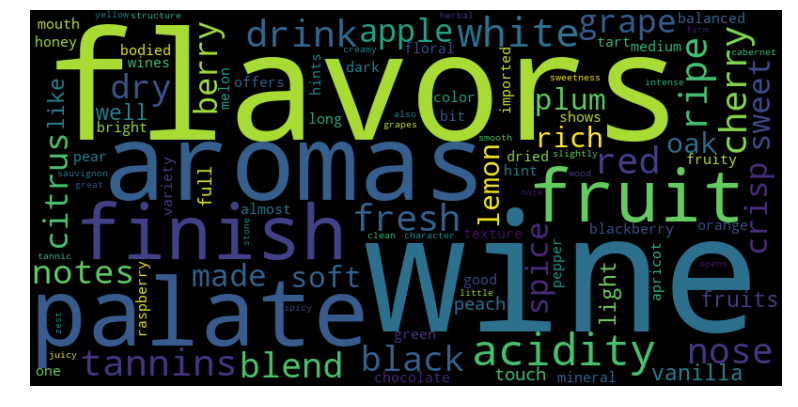

In [3]:
from nltk import sent_tokenize, word_tokenize, regexp_tokenize, FreqDist
from nltk.corpus import stopwords
from sklearn.datasets import fetch_20newsgroups
from wordcloud import WordCloud, STOPWORDS
from operator import itemgetter

raw = " ".join(wine.groupby("variety").first().description)

def tokenize(text, pat='(?u)\\b\\w\\w+\\b', stop_words='english', min_len=2):
    if stop_words:
        stop = set(stopwords.words(stop_words))
    return [w
            for w in regexp_tokenize(text.casefold(), pat)
            if w not in stop and len(w) >= min_len]



words = tokenize(raw, min_len=3)

fdist = FreqDist(words)
vocab = []
for w, s in sorted(fdist.items(), key=itemgetter(1), reverse=True)[:1000]:
    vocab.append(w)
    print(w)

wc = WordCloud(width=800, height=400, max_words=100).generate_from_frequencies(fdist)
plt.figure(figsize=(12,10))
plt.axis("off")
plt.imshow(wc, interpolation="bilinear")

In [4]:
stops = set(stopwords.words('english')) | {'skrewcap', 'oakville', 'wine', 'hail', 'others', 'named', 'among'}

vectorizer = TfidfVectorizer(strip_accents='ascii',
                             max_features=4096,
                             ngram_range=(1,3),
                             binary=True,
                             stop_words=stops,
                             token_pattern=r'(?u)\b[A-Za-z]+\b',
                             #vocabulary=vocab,
                             use_idf=False)
vectorizer.fit(wine['description'])
print(vectorizer.vocabulary_)


{'seductive': 3250, 'like': 2182, 'meaning': 2309, 'nose': 2493, 'lush': 2253, 'full': 1715, 'bacon': 292, 'cola': 889, 'blackberry': 452, 'yet': 4080, 'palate': 2634, 'tannic': 3655, 'shows': 3302, 'serious': 3268, 'fruit': 1641, 'bold': 525, 'ripe': 3095, 'structure': 3551, 'drunk': 1194, 'hearty': 1887, 'foods': 1579, 'steak': 3510, 'lamb': 2074, 'burgers': 605, 'vineyard': 3920, 'peak': 2705, 'modern': 2395, 'winemaking': 4018, 'softened': 3410, 'tannins': 3661, 'long': 2226, 'towards': 3819, 'cherries': 729, 'chocolate': 795, 'flashy': 1450, 'lots': 2242, 'new': 2468, 'french': 1608, 'oak': 2535, 'meant': 2311, 'may': 2306, 'tannins long': 3688, 'new french': 2469, 'french oak': 1609, 'new french oak': 2470, 'true': 3829, 'varietal': 3889, 'spice': 3449, 'something': 3422, 'always': 133, 'see': 3251, 'bargain': 324, 'priced': 2888, 'syrah': 3629, 'white': 3987, 'pepper': 2725, 'notes': 2510, 'lead': 2089, 'backed': 290, 'superripe': 3591, 'blueberries': 507, 'dried': 1169, 'spices

In [5]:
variety_to_id = {v:i for i, v in enumerate(sorted(set(wine['variety'])))}
id_to_name = {i: v for v, i in variety_to_id.items()}

wine['label'] = wine.variety.map(variety_to_id)

In [6]:
from scipy.sparse import *
from scipy import *
from sklearn.preprocessing import normalize

features = vectorizer.transform(wine['description'])
print("Computed feature vectors for individual reviews")

size = wine.label.max() + 1
reps = np.zeros(shape=(size, features.shape[1]), dtype=np.float)
print(reps.shape)

for index, label in enumerate(wine.label):
    reps[label] += features[index]
centers = normalize(reps, axis=1, norm='l2')

Computed feature vectors for individual reviews
(676, 4096)


In [7]:

def rank(positives, negatives):
    ref = np.zeros_like(centers[0])
    for p in positives:
        ref += centers[variety_to_id[p]]
    for n in negatives:
        ref -= centers[variety_to_id[n]]
    ref /= np.linalg.norm(ref)
    
    scores = (centers @ ref.T).ravel()
    scores = (scores + 1) / 2
    ranks = np.argsort(scores)
    print(scores.shape)

    for i, r in enumerate(ranks):
        print('%d) %-35s %.2f%%' % (i, id_to_name[r], 100*scores[r]))
        
        
def find(review):
    rev = vectorizer.transform([review]).todense()
    rev = np.asarray(rev).reshape(-1)
    print(rev.shape, type(rev))
    rev /= np.linalg.norm(rev)
    
    scores = (centers @ rev.T).ravel()
    scores = (scores + 1) / 2
    ranks = np.argsort(scores)
    print(scores.shape)
    
    for i, r in enumerate(ranks):
        print('%d) %-35s %.2f%%' % (i, id_to_name[r], 100*scores[r]))

In [8]:
rank(['Riesling'], [])

(676,)
0) Cabernet Sauvignon-Barbera          54.65%
1) Teroldego Rotaliano                 55.23%
2) Rebo                                55.96%
3) Albarossa                           56.21%
4) Baga-Touriga Nacional               56.52%
5) Groppello                           56.53%
6) Tinta Amarela                       56.86%
7) Syrah-Malbec                        57.25%
8) Valvin Muscat                       57.56%
9) Schioppettino                       57.80%
10) Sangiovese Cabernet                 57.90%
11) Prunelard                           57.90%
12) Tinta Miúda                         57.98%
13) Schwartzriesling                    58.07%
14) Ekigaïna                            58.67%
15) Parraleta                           58.79%
16) Ondenc                              58.81%
17) Merlot-Grenache                     58.86%
18) Carnelian                           58.96%
19) Canaiolo                            58.97%
20) Sacy                                59.05%
21) Pinot Blanc-

In [9]:
np.savetxt("centers.txt", centers)

import pickle

with open( "variety_to_id.p", "wb" ) as ids:
    pickle.dump(variety_to_id, ids)

In [10]:
pd.set_option("display.max_rows", 1024) 
wine.groupby('variety').count().sort_values("label", ascending=False)

,description,title,label
variety,,,
Pinot Noir,24658,24658,24658
Chardonnay,22067,22067,22067
Cabernet Sauvignon,19161,19161,19161
Red Blend,15705,15705,15705
Bordeaux-style Red Blend,13300,13300,13300
Riesling,9436,9436,9436
Syrah,9076,9076,9076
Sauvignon Blanc,8968,8968,8968
Merlot,7516,7516,7516


In [11]:
find("""
Mineral, soft ripe apple bracketed by lemon zest and honey tones. Some hints of white peach. Easy to drink on the deck or pair with food.
""")

(4096,) <class 'numpy.ndarray'>
(676,)
0) Prokupac                            50.00%
1) Tinta Amarela                       50.00%
2) Grignolino                          50.00%
3) Pinot Noir-Syrah                    50.00%
4) Babić                               50.00%
5) Malmsey                             50.00%
6) Garnacha-Monastrell                 50.00%
7) Schioppettino                       50.00%
8) País                                50.00%
9) Jacquez                             50.00%
10) Cabernet-Malbec                     50.00%
11) Côt                                 50.00%
12) Sangiovese-Syrah                    50.00%
13) Gelber Traminer                     50.00%
14) Souzao                              50.00%
15) Çalkarası                           50.00%
16) Syrah-Bonarda                       50.00%
17) Parraleta                           50.00%
18) Rufete                              50.00%
19) Tempranillo-Shiraz                  50.31%
20) Maturana                   

In [13]:
#Import all the dependencies
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from nltk.tokenize import word_tokenize

In [16]:
tagged_data = [TaggedDocument(words=word_tokenize(_d.lower()),
                       tags=wine.label) for _d in wine.description]

In [17]:
import multiprocessing
cores = multiprocessing.cpu_count()

max_epochs = 100
vec_size = 128
alpha = 0.025

model = Doc2Vec(vector_size=vec_size,
                window=10,
                min_count=5,
                workers=cores,
                dm=1)
  
model.build_vocab(tagged_data)


for epoch in range(max_epochs):
    print('iteration {0}'.format(epoch))
    random.shuffle(tagged_data)
    model.train(tagged_data,
                total_examples=model.corpus_count,
                epochs=model.iter)
    # decrease the learning rate
    model.alpha -= 0.0002
    # fix the learning rate, no decay
    model.min_alpha = model.alpha

model.save("d2v.model")
print("Model Saved")

/home/Evan/231n/lib64/python3.6/site-packages/gensim/models/doc2vec.py:574: UserWarning: The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.
  warnings.warn("The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.")


KeyboardInterrupt: 